In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
import os
from os.path import join
from pprint import pprint
from scipy import stats
from math import sqrt


In [9]:
df=pd.read_csv("/Users/yilmaz/Desktop/Admission_Predict_Ver1.1.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [10]:
sample1=df.loc[(df['University Rating']>=4) & (df['TOEFL Score']>=110)]
sample1

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
5,6,330,115,5,4.5,3.0,9.34,1,0.90
11,12,327,111,4,4.0,4.5,9.00,1,0.84
12,13,328,112,4,4.0,4.5,9.10,1,0.78
21,22,325,114,4,3.0,2.0,8.40,0,0.70
22,23,328,116,5,5.0,5.0,9.50,1,0.94
23,24,334,119,5,5.0,4.5,9.70,1,0.95
24,25,336,119,5,4.0,3.5,9.80,1,0.97
25,26,340,120,5,4.5,4.5,9.60,1,0.94
32,33,338,118,4,3.0,4.5,9.40,1,0.91


In [11]:
sample2=df.loc[(df['University Rating']<=3) & (df['TOEFL Score']<110)]
sample2

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
2,3,316,104,3,3.0,3.5,8.00,1,0.72
4,5,314,103,2,2.0,3.0,8.21,0,0.65
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45
10,11,325,106,3,3.5,4.0,8.40,1,0.52
13,14,307,109,3,4.0,3.0,8.00,1,0.62
14,15,311,104,3,3.5,2.0,8.20,1,0.61
15,16,314,105,3,3.5,2.5,8.30,0,0.54


Sample 1 is a distribution with mean: 328.82089552238807 and standard deviation: 6.423465846233178 over a sample size of 134 as can be seen in following plot


Text(0.5, 0, 'GRE Score')

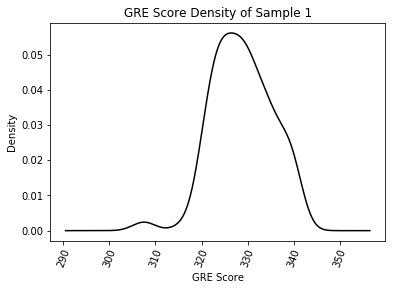

In [12]:
sample1stats=sample1['GRE Score'].describe()
sample1mean=sample1stats['mean']
sample1std=sample1stats['std']
sample1size=len(sample1.index)
print('Sample 1 is a distribution with mean: '+str(sample1mean)+ ' and standard deviation: '+str(sample1std)+' over a sample size of '+str(sample1size)+' as can be seen in following plot')
#After that just draw the plot
ax=sample1['GRE Score'].plot(kind="density",
                    title="GRE Score Density of Sample 1",
                   color="black",
                   rot=70)
ax.set_xlabel("GRE Score")

Sample 2 is a distribution with mean: 309.52471482889734 and standard deviation: 8.048893848806767 over a sample size of 263 as can be seen in following plot


Text(0.5, 0, 'GRE Score')

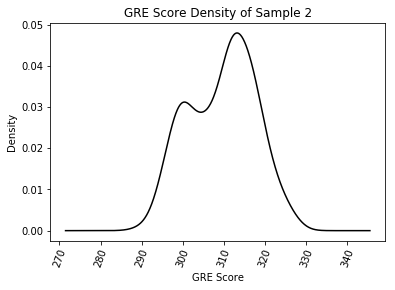

In [13]:
sample2stats=sample2['GRE Score'].describe()
sample2mean=sample2stats['mean']
sample2std=sample2stats['std']
sample2size=len(sample2.index)
print('Sample 2 is a distribution with mean: '+str(sample2mean)+ ' and standard deviation: '+str(sample2std)+' over a sample size of '+str(sample2size)+' as can be seen in following plot')
#After that just draw the plot
ax=sample2['GRE Score'].plot(kind="density",
                    title="GRE Score Density of Sample 2",
                   color="black",
                   rot=70)
ax.set_xlabel("GRE Score")

In [14]:
#t-test for difference between means
print("T-test for difference between means")
point_estimate=sample1mean - sample2mean
print("Point estimate is: "+ str(point_estimate))
null_value=0
print("Null value is: "+str(null_value))
degrees_of_freedom=min([sample1size-1,sample2size-1])
print("Degrees of Freedom is: "+str(degrees_of_freedom))
standard_error=sqrt((sample1std*sample1std/sample1size)+(sample2std*sample2std/sample2size))
print("Standard Error is: "+ str(standard_error))
test_statistic=(point_estimate-null_value)/standard_error
print("Test statistic is: "+ str(test_statistic))

T-test for difference between means
Point estimate is: 19.296180693490726
Null value is: 0
Degrees of Freedom is: 133
Standard Error is: 0.7444775972825233
Test statistic is: 25.919088450646797


In [15]:
t_critical=stats.t.ppf(1-0.001,degrees_of_freedom)
print("Critical region for one-tailed, 0.999 confidence level with "+str(degrees_of_freedom)+ " degrees of freedom is t > "+str(t_critical))

Critical region for one-tailed, 0.999 confidence level with 133 degrees of freedom is t > 3.152640258492447


In [16]:
print("Since clearly "+str(test_statistic)+ " > "+ str(t_critical)+" , it is inside critical region. Therefore we reject H0 with %99,9 confidence level")

Since clearly 25.919088450646797 > 3.152640258492447 , it is inside critical region. Therefore we reject H0 with %99,9 confidence level


In [17]:
#Checking with scipy
t_stat,p_val=stats.ttest_ind(sample1['GRE Score'],sample2['GRE Score'],equal_var=False)
t_stat

25.919088450646793

In [18]:
#Confirmation
if t_stat<=test_statistic*0.9999999999999999 and t_stat>=test_statistic*0.999999999999999:
    print("Results are the same!")
else:
    print("Results differ! Check your calculations")

Results are the same!


In [19]:
print("******************Linear Regression*******************")
X1=df['University Rating']
X2=df['TOEFL Score']
Y=df['GRE Score']
X1_Mean=X1.describe()['mean']
X2_Mean=X2.describe()['mean']
Y_Mean=Y.describe()['mean']
print("We will apply Least Square Method for both X1-Y pairs and X2-Y pairs")
print("X1 has a mean of "+ str(X1_Mean))
print("X2 has a mean of "+ str(X2_Mean))
print("Y has a mean of "+ str(Y_Mean))


******************Linear Regression*******************
We will apply Least Square Method for both X1-Y pairs and X2-Y pairs
X1 has a mean of 3.114
X2 has a mean of 107.192
Y has a mean of 316.472


In [20]:
Sxy_1 =0.0
Sxy_2= 0.0
Sxx_1=0.0
Sxx_2=0.0
for i in range(len(X1)):
    Sxy_1+=(X1[i]-X1_Mean)*(Y[i]-Y_Mean)
    Sxy_2+=(X2[i]-X2_Mean)*(Y[i]-Y_Mean)
    Sxx_1+=(X1[i]-X1_Mean)*(X1[i]-X1_Mean)
    Sxx_2+=(X2[i]-X2_Mean)*(X2[i]-X2_Mean)
slope_pair1=Sxy_1 / Sxx_1
slope_pair2=Sxy_2 / Sxx_2
intercept_pair1= Y_Mean - slope_pair1*X1_Mean
intercept_pair2= Y_Mean - slope_pair2*X2_Mean
print("Regression equation for University Rating-GRE Score pair is: "+str(intercept_pair1)+" + "+str(slope_pair1)+" * x = y")
print("Regression equation for TOEFL Score-GRE Score pair is: "+str(intercept_pair2)+" + "+str(slope_pair2)+" * x = y")

Regression equation for University Rating-GRE Score pair is: 296.92856726875925 + 6.275989958651478 * x = y
Regression equation for TOEFL Score-GRE Score pair is: 151.79684300770242 + 1.5362634990698705 * x = y


# Machine Learning Algotihms
In this section, we will solely focus on predicting chance of admission of students. However, since this attribute is continuous, we will try out some limit values and each time we will divide chance of admission into two categories: above and below.
Limit values will be in range of 0.35 to 0.65 and step size will be 0.03. Meaning that there will be 10 tests for each algorithm seperately. And then we will observe results in multiple plots.

Let us first start with creating a method for these algorithms.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
def Testing(df,limit,method):
    dfForHere=df.drop(['Chance of Admit ','Serial No.'],axis=1)
    admission=df['Chance of Admit '].values
    admissionBinary=[]
    for i in range(0,len(admission)):
        if float(admission[i])>=limit:
            admissionBinary.append(1)
        else:
            admissionBinary.append(0)
    dfForHere['admission']=admissionBinary
    target=dfForHere['admission']
    others=dfForHere.drop(['admission'],axis=1)
    X_train, X_test, y_train, y_test = train_test_split(others, target, test_size=0.33, random_state=42)
    if method=='LR':
        clf = LogisticRegression()
    else:
        clf = SVC(kernel="rbf")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return(accuracy_score(y_test, y_pred),f1_score(y_test, y_pred))

Now we will prepare our limit inputs and call the function for all of them.

In [22]:
limits=[]
accuracyResultsForLR=[]
accuracyResultsForSVM=[]
f1ResultsForLR=[]
f1ResultsForSVM=[]
for i in range(65,98,3):
    limits.append(0.01*i)
for lim in limits:
    a1,f1 = Testing(df,lim,'LR')
    a2,f2 = Testing(df,lim,'SVM')
    accuracyResultsForLR.append(a1)
    accuracyResultsForSVM.append(a2)
    f1ResultsForLR.append(f1)
    f1ResultsForSVM.append(f2)

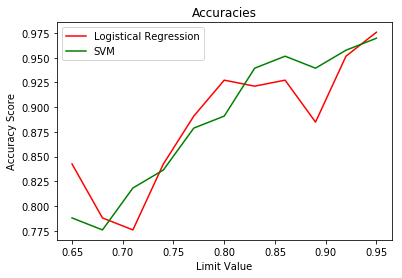

In [23]:
ax=plt.plot(limits,accuracyResultsForLR,color='r')
plt.plot(limits,accuracyResultsForSVM,color='g')
plt.title('Accuracies')
plt.xlabel('Limit Value')
plt.ylabel('Accuracy Score')
plt.legend(['Logistical Regression','SVM'])
plt.show()

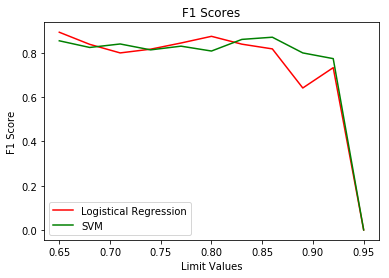

In [24]:
ax=plt.plot(limits,f1ResultsForLR,color='r')
plt.plot(limits,f1ResultsForSVM,color='g')
plt.title('F1 Scores')
plt.xlabel('Limit Values')
plt.ylabel('F1 Score')
plt.legend(['Logistical Regression','SVM'])
plt.show()

Some crucial observations on the plots and therefore algorithms can be listed here.
 - As the limit value on admission chance increases, accuracy also increases.
 - F1 Scores are more steady compared to accuracy scores.
 - F1 scores drop to 0 at the highest limit value.
 - All scores are similar for both algorithms. Even though some irregularities occur, we can say that both algorithms perform similar.

From these observations, we can comment on the algorithms as well. These results shows us how similar and how successful these algorithms are on our dataset. The reason of this success is actually how implicative our dataset is for telling the chance of admission. Since the dataset consists of some attributes about students and corresponding chance of admit. It is reasonable for either universities or author of this dataset to use some kind of algorithm to come up with this chance of admit and our results support this idea.
Another thing is that algorithms perform better when limit on chance of admit increases. This is due to the fact that set of successful students get thinner with this operation and conditions on admission becomes tight enough that our algorithms work near perfect.
Lastly, we can comment on the F1 score behavior. As we said earlier, they drop to 0 at a certain point. This is due to the calculation process in the F1 score. Some multiplier must be 0 for this to occur.

# Project Evaluation
There were not much difficulties along the way of this project. Only obstacle was that none of us was very comfortable with Python language and also dealing with datasets and statistical operations. Other than that operations performed really well for our dataset since it had good qualities in terms of prediction and analysis. This shows us that we picked a decent dataset. However, there were also some shortcomings along the way. The fact that our dataset had so few data points restricted us on certain points and can raise some questions over our work.
If we had additional resources, we would use a dataset that shows us socioeconomic situations for the students who apply for the master. For instance, economic statue of the students, their working field, family properties etc. could help us develop better algorithms for the project.
One downside of the final step of the project was that both algorithms for machine learning worked real fine in terms of accuracy. This is generally not a bad showing but it makes comparison less indicative and it is one of the purposes of this last step. Still, a few comments can be done on this side. When we looked at the graphs in detail, we realized that Logistical Regression algorithm has dramatic drops at some points. This convinced us to prefer SVM over Logistical Regression in next time we are dealing with classification of some data.
Improvements on the project can be categorized in two groups. First one is that we need more data points and attributes. This would make our work to have more quality for sure and increase performance on ML algorithms. The other improvement would be to use more advanced ML algorithms. Even though they perform well, their adequacy can be questioned independent from our dataset and project.